## Libraries

In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
import nltk

from unicodedata import normalize as norm
import re

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
df_tweets = pd.read_csv("df_tweets.csv")
df_tweets.head()

,conversation_id,in_reply_to_user_id,public_metrics,created_at,author_id,id,text
0,1466874887524421632,2.230226e+09,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-04T23:05:28.000Z,1130648708566179841,1467268847745081346,@UniversalPicsBr @anygabrielly @Fiuk quero tan...
1,1467268691884654595,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-04T23:04:51.000Z,1355987894603837442,1467268691884654595,Tata Werneck dá show de maturidade e pede fim ...
2,1467249854728609797,1.441891e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-04T23:03:56.000Z,1465436751388885002,1467268463433560066,@Claudia77613373 @afazendarecord @dynhoalvesre...
3,1467267671632887816,NaN,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",2021-12-04T23:00:48.000Z,185448711,1467267671632887816,Eu e mainha botamos o lady night com Fiuk aqui...
4,1467132306989191168,1.418676e+18,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",2021-12-04T22:59:40.000Z,1081607577778225153,1467267388383109120,@yaeminion Alguem me explicar por que o Fiuk é...


In [14]:
from datetime import datetime, timedelta

# datetime object containing current date and time
now = datetime.utcnow()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%dT%H:%M:%S.000Z")
print("date and time =", dt_string)

    
d = now - timedelta(days=5)

dt_string2 = d.strftime("%Y-%m-%dT%H:%M:%S.000Z")

now = 2021-12-19 17:17:54.049865
date and time = 2021-12-19T17:17:54.000Z
date and time = 2021-12-14T17:17:54.000Z


In [16]:
datetime.utcnow() - timedelta(hours=5)

datetime.datetime(2021, 12, 19, 12, 25, 25, 837020)

In [7]:
type(df_tweets["created_at"][0])

str

In [3]:

stop_words_domain=["não","da","globoplay",
                    "só","pra","vc","pois","lá","outro",
                    "outra","vou","vão","assim","outro",
                    "outra","ter","ver","agora","hoje",
                    "tudo","todos","todo","ah","acho",
                    "achamos","né","ser","vai","alguma",
                    "mas","porém","entretanto",
                    "faz","fazemos","farão",
                    "tbm","fazia","tá","tb","ia",
                    "ir","to","nela","nele","nelas",
                    "neles","naquele","naquueles",
                    "naquelas","naquela","coisa","mim",
                    "tô","aí","n",
                    "pro","é","dessa","vamos","q",
                    "desse","tava","msm","vamo","que","porque",
                    "nem","mano","manos","caras","xd","kkkk","pq","por","cara",
                    "gente","dar","sobre","tão","toda","vezes",
                    "então","viu","vemos","pode","podemos","vez",
                    "vcs","hein","quer","sim","deu","já","demos",
                    "todas","aqui","sei","sabemos","fazer","fiz",
                    "fez","fazemos","vem","vamos","ainda","tanto","nesse","pocah"] 

## Functions for exploratory analysis 

In [14]:
def plot_bar_count_words(text_column=None,
                         label_column=None,
                         name_class=None,
                         dataframe=None,
                         metric='SUM',
                         top=50,return_df=True):
    
    corpus = dataframe[text_column].values
    
 
    
    vectorizer = CountVectorizer(ngram_range=(3,4))
    data_vect = vectorizer.fit_transform(corpus)
    data_vect = data_vect.toarray()
    
    print(vectorizer.get_feature_names())
    
    df_count_words =  pd.DataFrame({
    "WORDS":vectorizer.get_feature_names() ,
    "MEAN":data_vect.mean(axis=0),
    "SUM":data_vect.sum(axis=0),
    "STD":data_vect.std(axis=0),
    }) 
    
    

    if return_df:
    
        return df_count_words[[metric,'WORDS']].sort_values(by=[metric],ascending=False)[0:top]
    
    else:
        
        fig = plt.figure(figsize=(15,10))
        
        ax = sns.barplot(x=metric, 
                 y="WORDS", 
                 data=df_count_words[[metric,'WORDS']].sort_values(by=[metric],
                                                                            ascending=False)[0:top])
        

In [5]:

def convert_text_to_no_repeat_words(text):

    text_with_no_repeat_words = text.split(" ")

    text_with_no_repeat_words = [i for i in text_with_no_repeat_words if i!=""]

    text_with_no_repeat_words = set(text_with_no_repeat_words)

    text_with_no_repeat_words = list(text_with_no_repeat_words)

    text_with_no_repeat_words = " ".join(text_with_no_repeat_words)

    return text_with_no_repeat_words


In [6]:
def extract_hashtags(tweet):
    
    list_hashtags = re.findall(r"#[a-zA-Zà-úÀ-Ú0-9]+",tweet)
    
    string_only_hashtags = " ".join(list_hashtags)
    
    return string_only_hashtags


In [7]:
def extract_citation(tweet):
    
    list_hashtags = re.findall(r"@[a-zA-Zà-úÀ-Ú0-9]+",tweet)
    
    string_only_hashtags = " ".join(list_hashtags)
    
    return string_only_hashtags

## Function to clean the texts

In [8]:
def text_cleaner(text,stop_words_domain =[]):

    
    nltk_stopwords =  stopwords.words('portuguese') + stop_words_domain

    nltk_stopwords_processed = [norm('NFKD', i).encode('ascii', 'ignore').decode().lower() for i in nltk_stopwords]

    regex_stop_words = '|'.join(nltk_stopwords)

    
    regex_remove_https = 'https([a-zA-Zà-úÀ-Ú0-9]|[-()\#/@;:<>{}`+=~|.!?,])+'


    text_without_https = re.sub(r"(\s|^){0}(\s{0})*($|\s)".format(regex_remove_https)," ",text)


    text_without_special_caracteres = re.sub(r"[^a-zA-ZÀ-Úà-ú]+"," ",text_without_https)

    text_without_alone_caractere = re.sub(r"\s[a-zA-ZÀ-Úà-ú]\s|\s[a-zA-ZÀ-Úà-ú]$|^[a-zA-ZÀ-Úà-ú]\s"," ",text_without_special_caracteres)
    

    text_pattern_space = re.sub(r"\s+"," ",text_without_alone_caractere)

    
    text_split = text_pattern_space.split(" ")

    
    text_list = [i for i in text_split  if norm('NFKD', i).encode('ascii', 'ignore').decode().lower() not in nltk_stopwords_processed]


    text_final = " ".join(text_list)


    return text_final

# Test Plots

In [15]:
df_report_sum_docs = plot_bar_count_words(text_column='text',
                                                dataframe=df_tweets,
                                                metric='SUM',top=10,return_df=True)

['04 de dezembro', '04 de dezembro as', '10 12 desse', '10 12 desse ano', '10 babu você', '10 babu você nunca', '10 ex participantes', '10 ex participantes do', '10 minutos de', '10 minutos de programa', '10 minutos na', '10 minutos na presença', '10 principais fofocas', '10 principais fofocas da', '10 segundos dessa', '10 segundos dessa entrevista', '100 dias todas', '100 dias todas as', '11k de visualizações', '11k de visualizações eu', '12 anos fui', '12 anos fui fã', '12 desse ano', '12 desse ano com', '12 vou defender', '12 vou defender fiuk', '13 minutos eu', '13 minutos eu não', '13 minutos normal', '13 minutos normal durar', '14 às 22', '14 às 22 será', '15 anos pedindo', '15 anos pedindo pro', '15 longos minutos', '15 min cheio', '15 min cheio de', '15 min climão', '15 min climão foi', '15 min de', '15 min de fiuk', '15 min do', '15 min do fiuk', '15 min do programa', '15 min foi', '15 min foi muito', '15 minutos acha', '15 minutos acha que', '15 minutos de', '15 minutos de fi

In [16]:
df_report_sum_docs

,SUM,WORDS
11561,57,fiuk https co
15123,31,juliette fiuk https
15124,31,juliette fiuk https co
18556,21,no lady night
22190,15,programa da tata
11890,15,fiuk no lady
11891,14,fiuk no lady night
15440,14,lady night com
3335,13,chato pra caralho
11135,13,fiuk chato pra


In [8]:
df_tweets["text_clean"] = df_tweets["text"].apply(lambda x: text_cleaner(text = x,stop_words_domain=stop_words_domain))

NameError: name 'text_cleaner' is not defined

In [ ]:
## Test get #

In [9]:
tweet = "duhudhuhd #tweet #tweet1 usuhsdsnsund #tweet2 jdisdisndsjdis #tweet3 ususjus"

In [10]:
re.search("#([a-zA-Zà-úÀ-Ú0-9]|[-()\#/@;:<>{}`+=~|.!?,])+",tweet).group()

'#tweet'

In [11]:
#(?<![#@])\b\w+\b

re.findall("#[a-zA-Zà-úÀ-Ú0-9]+",tweet)

['#tweet', '#tweet1', '#tweet2', '#tweet3']

In [12]:
re.sub("#[a-zA-Zà-úÀ-Ú0-9]+","",tweet)

'duhudhuhd   usuhsdsnsund  jdisdisndsjdis  ususjus'

In [ ]:
re.match("#([a-zA-Zà-úÀ-Ú0-9]|[-()\#/@;:<>{}`+=~|.!?,])+",tweet)

In [ ]:
df_tweets["hashtags"] = df_tweets["text"].apply(lambda x: extract_hashtags(tweet = x))

In [ ]:
df_tweets.head()

In [ ]:
df_report_sum_docs = plot_bar_count_words(text_column='hashtags',
                                                dataframe=df_tweets,
                                                metric='SUM',top=50,return_df=True)
df_report_sum_docs

In [ ]:
df_report_sum_docs["WORDS"] =  "#" + df_report_sum_docs["WORDS"]

In [ ]:
df_report_sum_docs

In [ ]:
df_tweets["citations"] = df_tweets["text"].apply(lambda x: extract_citation(tweet = x))

In [ ]:
df_report_sum_docs = plot_bar_count_words(text_column='citations',
                                                dataframe=df_tweets,
                                                metric='SUM',top=50,return_df=True)
df_report_sum_docs

## HASHTAGS AND CITATIONS

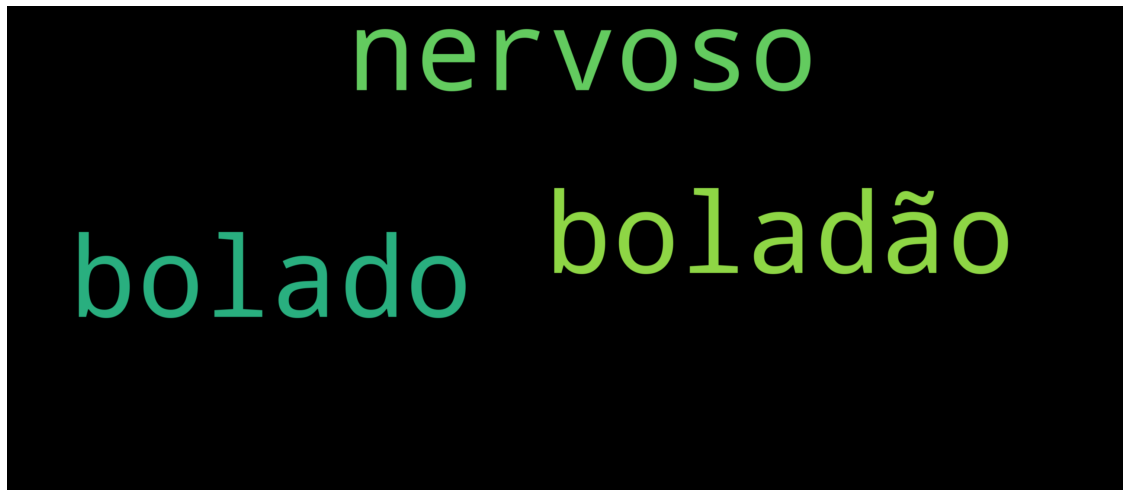

In [11]:
hashtags_citations_joined = "#bolado @boladão #nervoso "

wordcloud_hashtags_citations = WordCloud(include_numbers=True,max_font_size=300, max_words=70, background_color="black",width=3000, height=1300,collocations=True).generate(hashtags_citations_joined)

#wordcloud_hashtags_citations.to_file(IMAGE_WORD_CLOUD_HASHTAGS_CITATIONS_PATH)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_hashtags_citations,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
re.sub(r"\#{0}|\@{0}".format("content")," ",hashtags_citations_joined)

'#bolado @boladão #nervoso '

In [16]:
hashtags_citations_joined

'#bolado @boladão #nervoso '

In [19]:
"\#{0}|\@{0}".format(1)

'\\#1|\\@1'